# Flood Relief Analysis - Interesting Graphs
## Analyzing Victim Requests and Support Status

This notebook provides visual analysis of flood relief victim requests including temporal patterns, victim categories, and support status.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

# Load Thai font for better display
import matplotlib.font_manager as fm
try:
    font_path = '/Users/coraline/Documents/flood_relief/Sarabun-Regular.ttf'
    fm.fontManager.addfont(font_path)
    plt.rcParams['font.family'] = 'Sarabun'
except:
    print('Thai font not available, using default')

# Load data
df_victims = pd.read_csv('/Users/coraline/Documents/flood_relief/mart_request_by_date_victims.csv')

# Display basic info
print('Victim Requests Data Shape:', df_victims.shape)
print('\nData Info:')
print(df_victims.info())
print('\nFirst few rows:')
display(df_victims.head())

Victim Requests Data Shape: (9, 10)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   created_date   9 non-null      object
 1   status_text    9 non-null      object
 2   cnt_general    9 non-null      int64 
 3   cnt_elderly    9 non-null      int64 
 4   cnt_child      9 non-null      int64 
 5   cnt_bedridden  9 non-null      int64 
 6   cnt_disabled   9 non-null      int64 
 7   cnt_homebound  9 non-null      int64 
 8   cnt_pet        9 non-null      int64 
 9   latest_update  9 non-null      object
dtypes: int64(7), object(3)
memory usage: 852.0+ bytes
None

First few rows:


,created_date,status_text,cnt_general,cnt_elderly,cnt_child,cnt_bedridden,cnt_disabled,cnt_homebound,cnt_pet,latest_update
0,2025-11-23,กำลังดำเนินการช่วยเหลือ...,1,0,1,0,0,0,0,2025-11-26T08:08:19.776000
1,2025-11-23,รอการช่วยเหลือ,1,0,0,0,0,0,1,2025-11-26T08:08:19.776000
2,2025-11-24,กำลังดำเนินการช่วยเหลือ...,1,0,1,0,0,0,0,2025-11-26T08:08:19.776000
3,2025-11-24,รอการช่วยเหลือ,457,490,305,43,33,62,150,2025-11-26T08:08:19.776000
4,2025-11-25,กำลังดำเนินการช่วยเหลือ...,4,2,2,0,1,0,0,2025-11-26T08:08:19.776000


## 1. Total Victims Over Time by Status

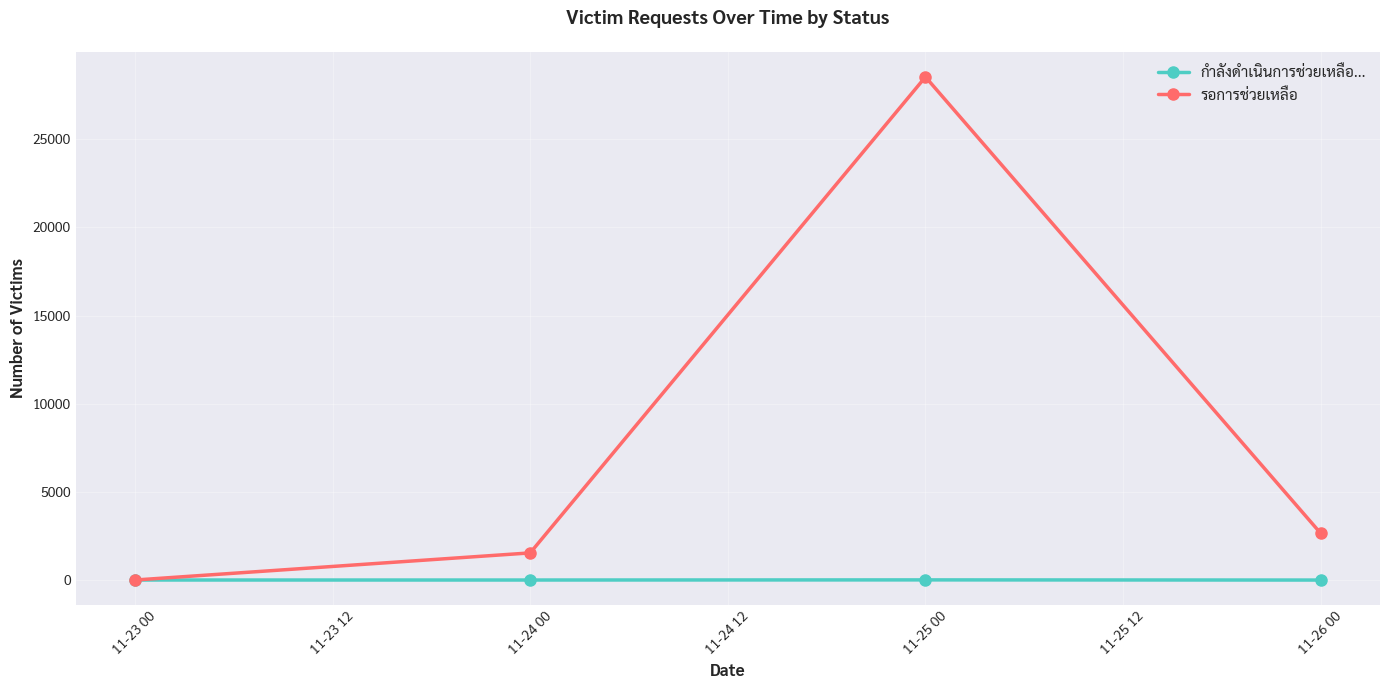


Total Victims Waiting for Help: 32724
Total Victims Being Helped: 13


In [2]:
# Convert date column
df_victims['created_date'] = pd.to_datetime(df_victims['created_date'])

# Create figure with subplots
fig, ax = plt.subplots(figsize=(14, 7))

# Get status labels
statuses = df_victims['status_text'].unique()

# Plot for each status
colors = {'รอการช่วยเหลือ': '#FF6B6B', 'กำลังดำเนินการช่วยเหลือ...': '#4ECDC4'}

for status in statuses:
    if status in colors:
        data = df_victims[df_victims['status_text'] == status]
        total_victims = (data['cnt_general'] + data['cnt_elderly'] + data['cnt_child'] + 
                        data['cnt_bedridden'] + data['cnt_disabled'] + data['cnt_homebound'] + 
                        data['cnt_pet'])
        ax.plot(data['created_date'], total_victims, marker='o', linewidth=2.5, 
               label=status, color=colors[status], markersize=8)

ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Victims', fontsize=12, fontweight='bold')
ax.set_title('Victim Requests Over Time by Status', fontsize=14, fontweight='bold', pad=20)
ax.legend(fontsize=11, loc='best')
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print('\nTotal Victims Waiting for Help:', df_victims[df_victims['status_text'] == 'รอการช่วยเหลือ'][['cnt_general', 'cnt_elderly', 'cnt_child', 'cnt_bedridden', 'cnt_disabled', 'cnt_homebound', 'cnt_pet']].sum().sum())
print('Total Victims Being Helped:', df_victims[df_victims['status_text'] == 'กำลังดำเนินการช่วยเหลือ...'][['cnt_general', 'cnt_elderly', 'cnt_child', 'cnt_bedridden', 'cnt_disabled', 'cnt_homebound', 'cnt_pet']].sum().sum())

## 2. Vulnerable Population Distribution

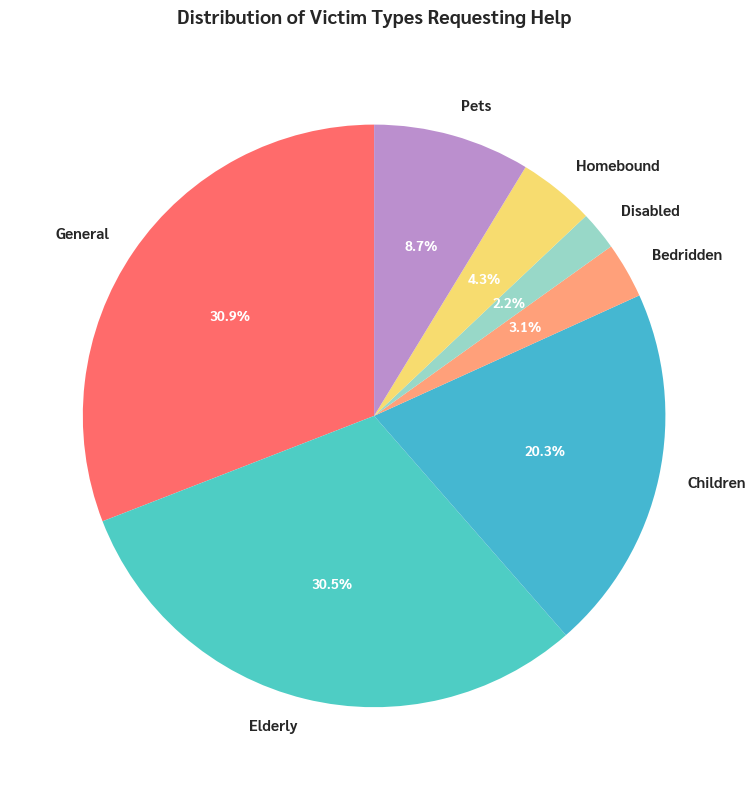


Vulnerable Population Breakdown:
General: 10,125
Elderly: 10,011
Children: 6,669
Pets: 2,853
Homebound: 1,394
Bedridden: 1,014
Disabled: 708


In [3]:
# Calculate totals for each vulnerable group
vulnerable_categories = {
    'General': df_victims['cnt_general'].sum(),
    'Elderly': df_victims['cnt_elderly'].sum(),
    'Children': df_victims['cnt_child'].sum(),
    'Bedridden': df_victims['cnt_bedridden'].sum(),
    'Disabled': df_victims['cnt_disabled'].sum(),
    'Homebound': df_victims['cnt_homebound'].sum(),
    'Pets': df_victims['cnt_pet'].sum()
}

# Create pie chart
fig, ax = plt.subplots(figsize=(12, 8))
colors_pie = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F', '#BB8FCE']

wedges, texts, autotexts = ax.pie(vulnerable_categories.values(), 
                                     labels=vulnerable_categories.keys(),
                                     autopct='%1.1f%%',
                                     colors=colors_pie,
                                     startangle=90,
                                     textprops={'fontsize': 11, 'fontweight': 'bold'})

# Format percentage text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')

ax.set_title('Distribution of Victim Types Requesting Help', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print('\nVulnerable Population Breakdown:')
for category, count in sorted(vulnerable_categories.items(), key=lambda x: x[1], reverse=True):
    print(f'{category}: {count:,}')

## 3. Support Status Comparison

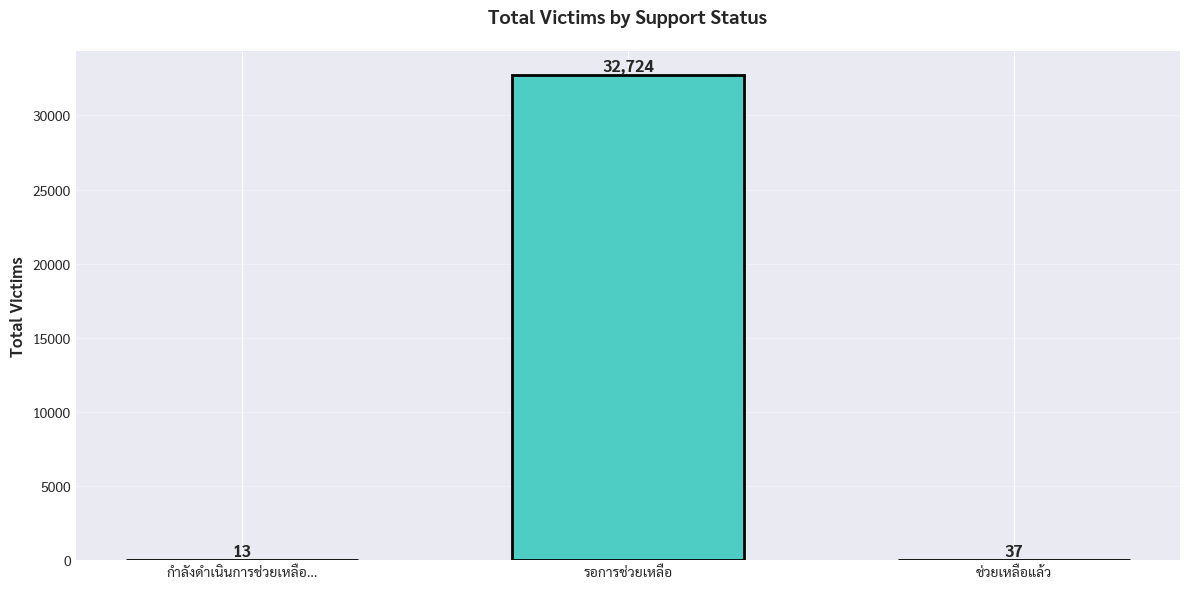


Support Status Summary:
กำลังดำเนินการช่วยเหลือ...: 13 (0.0%)
รอการช่วยเหลือ: 32,724 (99.8%)
ช่วยเหลือแล้ว: 37 (0.1%)


In [4]:
# Calculate total victims by status
status_totals = {}
for status in df_victims['status_text'].unique():
    data = df_victims[df_victims['status_text'] == status]
    total = (data['cnt_general'] + data['cnt_elderly'] + data['cnt_child'] + 
            data['cnt_bedridden'] + data['cnt_disabled'] + data['cnt_homebound'] + 
            data['cnt_pet']).sum()
    status_totals[status] = total

# Create bar chart
fig, ax = plt.subplots(figsize=(12, 6))
statuses = list(status_totals.keys())
totals = list(status_totals.values())

bars = ax.bar(statuses, totals, color=['#FF6B6B', '#4ECDC4'], width=0.6, edgecolor='black', linewidth=2)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
           f'{int(height):,}',
           ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylabel('Total Victims', fontsize=12, fontweight='bold')
ax.set_title('Total Victims by Support Status', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print('\nSupport Status Summary:')
for status, total in status_totals.items():
    percentage = (total / sum(status_totals.values())) * 100
    print(f'{status}: {total:,} ({percentage:.1f}%)')

## 4. Vulnerable Groups Trend Over Time

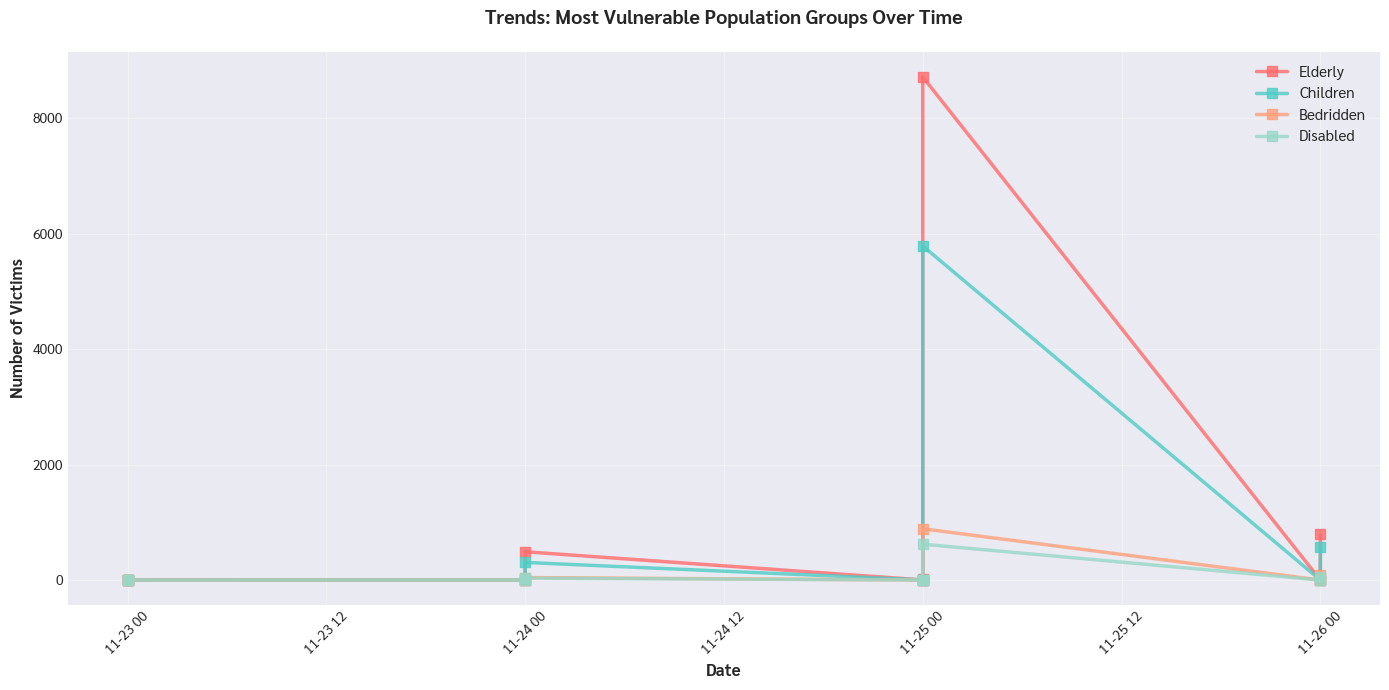


Vulnerable Groups Summary:
Elderly: 10,011
Children: 6,669
Bedridden: 1,014
Disabled: 708


In [5]:
# Create trend lines for vulnerable groups
fig, ax = plt.subplots(figsize=(14, 7))

groups = {
    'Elderly': 'cnt_elderly',
    'Children': 'cnt_child',
    'Bedridden': 'cnt_bedridden',
    'Disabled': 'cnt_disabled'
}

colors_trend = {'Elderly': '#FF6B6B', 'Children': '#4ECDC4', 'Bedridden': '#FFA07A', 'Disabled': '#98D8C8'}

for label, col in groups.items():
    ax.plot(df_victims['created_date'], df_victims[col], marker='s', linewidth=2.5,
           label=label, color=colors_trend[label], markersize=7, alpha=0.8)

ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Victims', fontsize=12, fontweight='bold')
ax.set_title('Trends: Most Vulnerable Population Groups Over Time', fontsize=14, fontweight='bold', pad=20)
ax.legend(fontsize=11, loc='best')
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print('\nVulnerable Groups Summary:')
print(f'Elderly: {df_victims["cnt_elderly"].sum():,}')
print(f'Children: {df_victims["cnt_child"].sum():,}')
print(f'Bedridden: {df_victims["cnt_bedridden"].sum():,}')
print(f'Disabled: {df_victims["cnt_disabled"].sum():,}')

## 5. Stacked Area Chart - All Vulnerable Groups Combined

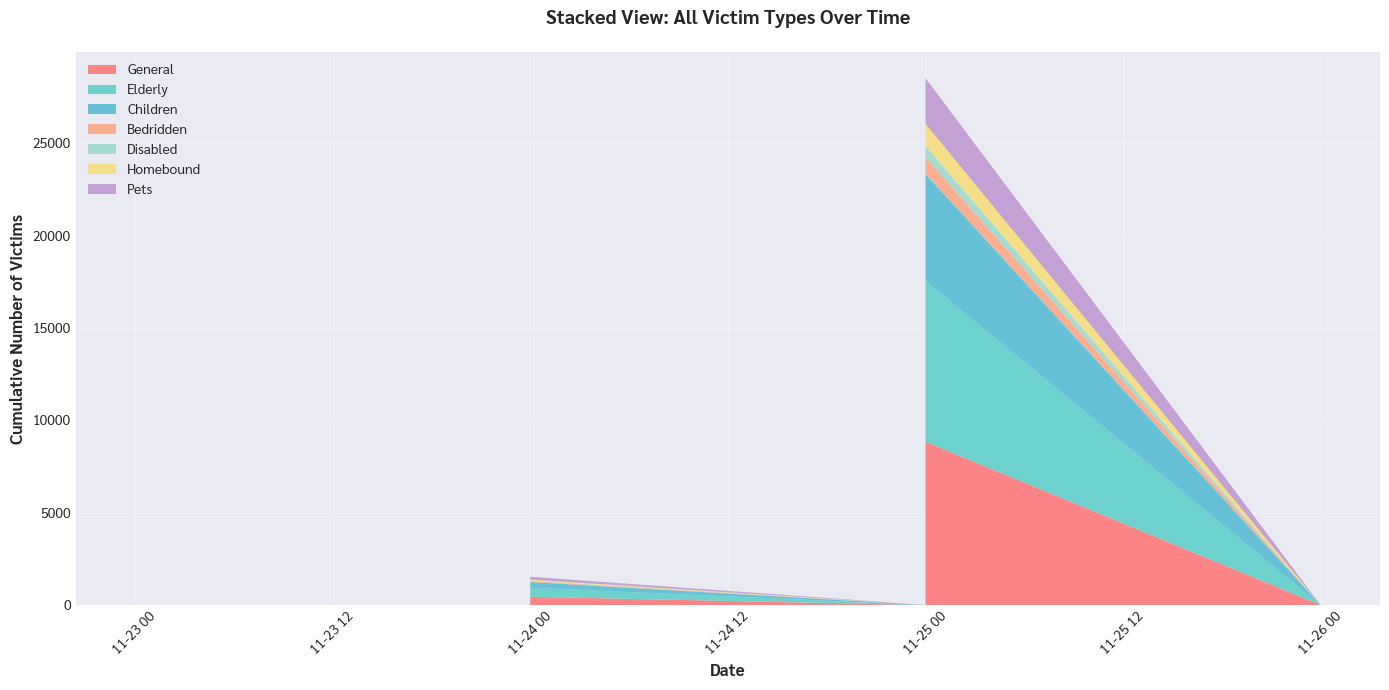

In [6]:
# Create stacked area chart
fig, ax = plt.subplots(figsize=(14, 7))

df_plot = df_victims[['created_date', 'cnt_general', 'cnt_elderly', 'cnt_child', 
                       'cnt_bedridden', 'cnt_disabled', 'cnt_homebound', 'cnt_pet']].copy()

ax.stackplot(df_plot['created_date'],
            df_plot['cnt_general'],
            df_plot['cnt_elderly'],
            df_plot['cnt_child'],
            df_plot['cnt_bedridden'],
            df_plot['cnt_disabled'],
            df_plot['cnt_homebound'],
            df_plot['cnt_pet'],
            labels=['General', 'Elderly', 'Children', 'Bedridden', 'Disabled', 'Homebound', 'Pets'],
            colors=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F', '#BB8FCE'],
            alpha=0.8)

ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Cumulative Number of Victims', fontsize=12, fontweight='bold')
ax.set_title('Stacked View: All Victim Types Over Time', fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='upper left', fontsize=10)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 6. Daily Victim Requests Summary Statistics

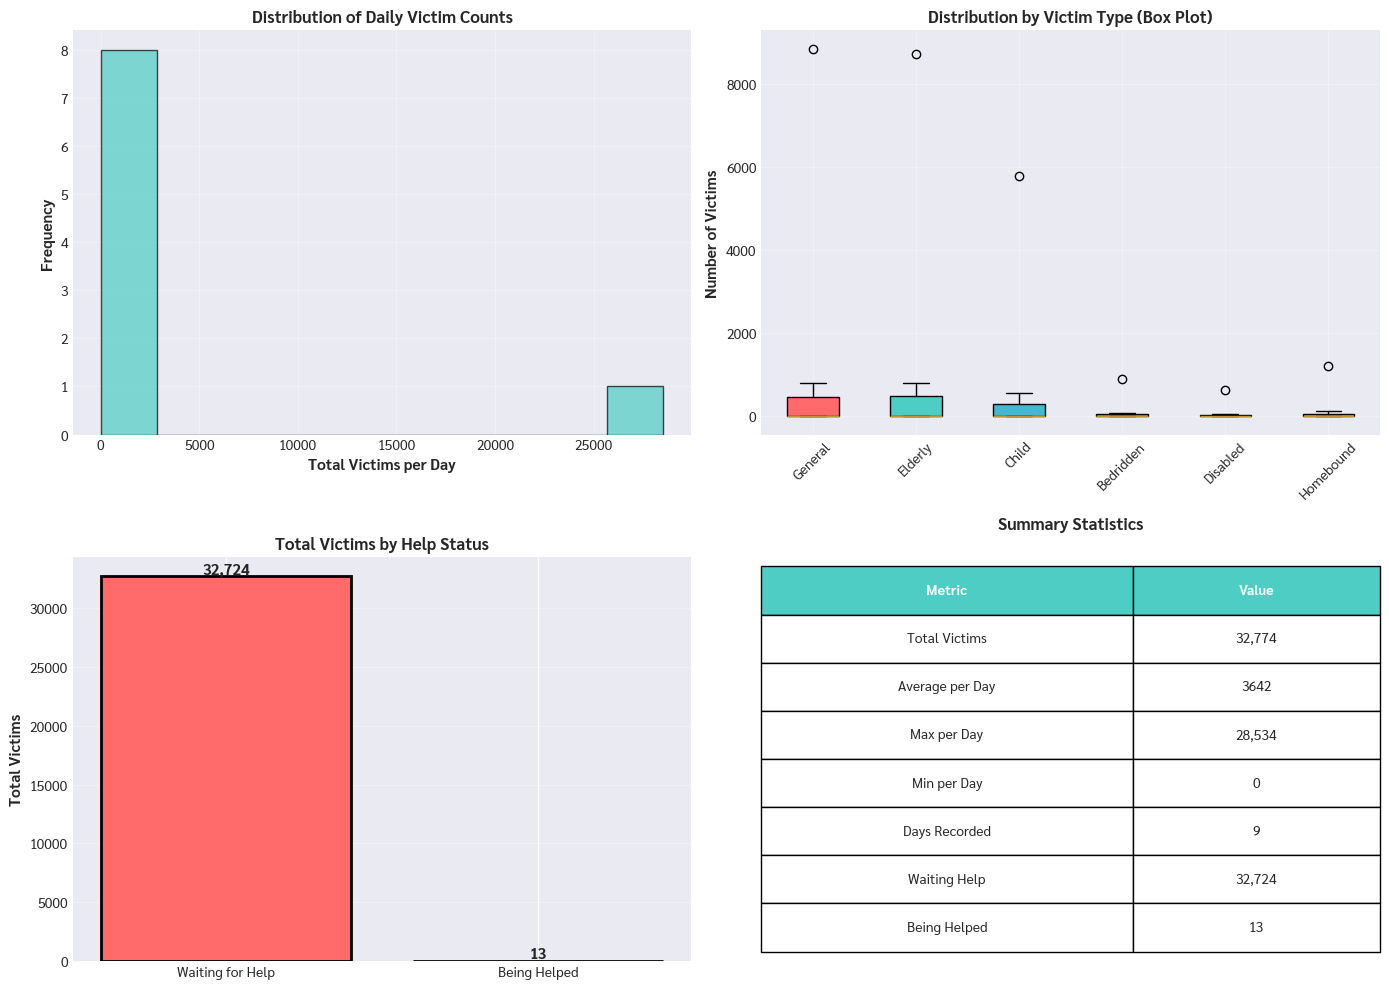

In [7]:
# Calculate daily totals
df_victims['total_daily'] = (df_victims['cnt_general'] + df_victims['cnt_elderly'] + 
                              df_victims['cnt_child'] + df_victims['cnt_bedridden'] + 
                              df_victims['cnt_disabled'] + df_victims['cnt_homebound'] + 
                              df_victims['cnt_pet'])

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Daily total victims histogram
axes[0, 0].hist(df_victims['total_daily'], bins=10, color='#4ECDC4', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Total Victims per Day', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Distribution of Daily Victim Counts', fontsize=12, fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# 2. Daily totals box plot
box_data = [df_victims['cnt_general'], df_victims['cnt_elderly'], df_victims['cnt_child'],
            df_victims['cnt_bedridden'], df_victims['cnt_disabled'], df_victims['cnt_homebound']]
bp = axes[0, 1].boxplot(box_data, labels=['General', 'Elderly', 'Child', 'Bedridden', 'Disabled', 'Homebound'],
                         patch_artist=True)
for patch, color in zip(bp['boxes'], ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F']):
    patch.set_facecolor(color)
axes[0, 1].set_ylabel('Number of Victims', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Distribution by Victim Type (Box Plot)', fontsize=12, fontweight='bold')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(alpha=0.3)

# 3. Status breakdown bar chart
waiting = df_victims[df_victims['status_text'] == 'รอการช่วยเหลือ']['total_daily'].sum()
helping = df_victims[df_victims['status_text'] == 'กำลังดำเนินการช่วยเหลือ...']['total_daily'].sum()
statuses_bar = ['Waiting for Help', 'Being Helped']
totals_bar = [waiting, helping]

bars = axes[1, 0].bar(statuses_bar, totals_bar, color=['#FF6B6B', '#4ECDC4'], edgecolor='black', linewidth=2)
for bar in bars:
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height,
                   f'{int(height):,}', ha='center', va='bottom', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Total Victims', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Total Victims by Help Status', fontsize=12, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Statistics summary table
axes[1, 1].axis('off')
stats_data = [
    ['Metric', 'Value'],
    ['Total Victims', f'{df_victims["total_daily"].sum():,}'],
    ['Average per Day', f'{df_victims["total_daily"].mean():.0f}'],
    ['Max per Day', f'{df_victims["total_daily"].max():,}'],
    ['Min per Day', f'{df_victims["total_daily"].min():,}'],
    ['Days Recorded', f'{len(df_victims)}'],
    ['Waiting Help', f'{waiting:,}'],
    ['Being Helped', f'{helping:,}']
]

table = axes[1, 1].table(cellText=stats_data, cellLoc='center', loc='center',
                         colWidths=[0.6, 0.4])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2.5)

# Color header row
for i in range(2):
    table[(0, i)].set_facecolor('#4ECDC4')
    table[(0, i)].set_text_props(weight='bold', color='white')

axes[1, 1].set_title('Summary Statistics', fontsize=12, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

## Summary & Key Insights

In [8]:
print('=' * 70)
print('FLOOD RELIEF - KEY INSIGHTS'.center(70))
print('=' * 70)

total_victims = df_victims['total_daily'].sum()
waiting = df_victims[df_victims['status_text'] == 'รอการช่วยเหลือ']['total_daily'].sum()
helping = df_victims[df_victims['status_text'] == 'กำลังดำเนินการช่วยเหลือ...']['total_daily'].sum()

print(f'\n📊 OVERALL STATISTICS:')
print(f'  • Total Victims Recorded: {total_victims:,}')
print(f'  • Still Waiting for Help: {waiting:,} ({(waiting/total_victims)*100:.1f}%)')
print(f'  • Currently Being Helped: {helping:,} ({(helping/total_victims)*100:.1f}%)')
print(f'  • Days of Data: {len(df_victims)}')

print(f'\n👥 VULNERABLE POPULATIONS (Total Count):')
print(f'  • Elderly: {df_victims["cnt_elderly"].sum():,}')
print(f'  • Children: {df_victims["cnt_child"].sum():,}')
print(f'  • Bedridden: {df_victims["cnt_bedridden"].sum():,}')
print(f'  • Disabled: {df_victims["cnt_disabled"].sum():,}')
print(f'  • Homebound: {df_victims["cnt_homebound"].sum():,}')

print(f'\n📈 DAILY STATISTICS:')
print(f'  • Average Victims/Day: {df_victims["total_daily"].mean():.0f}')
print(f'  • Peak Day: {df_victims["total_daily"].max():,} victims')
print(f'  • Lowest Day: {df_victims["total_daily"].min():,} victims')
print(f'  • Standard Deviation: {df_victims["total_daily"].std():.0f}')

print(f'\n🐾 OTHER:')
print(f'  • Pets Needing Help: {df_victims["cnt_pet"].sum():,}')

print('\n' + '=' * 70)

                     FLOOD RELIEF - KEY INSIGHTS                      

📊 OVERALL STATISTICS:
  • Total Victims Recorded: 32,774
  • Still Waiting for Help: 32,724 (99.8%)
  • Currently Being Helped: 13 (0.0%)
  • Days of Data: 9

👥 VULNERABLE POPULATIONS (Total Count):
  • Elderly: 10,011
  • Children: 6,669
  • Bedridden: 1,014
  • Disabled: 708
  • Homebound: 1,394

📈 DAILY STATISTICS:
  • Average Victims/Day: 3642
  • Peak Day: 28,534 victims
  • Lowest Day: 0 victims
  • Standard Deviation: 9382

🐾 OTHER:
  • Pets Needing Help: 2,853

